### Instalación de librerías necesarias para el proceso de análisis

In [397]:
!pip install wordcloud
!pip install num2words
!pip install stop_words
!pip install gensim
!pip install nltk
!pip install wget
!pip install numpy
!pip install scikit-learn
!pip install threadpoolctl
!pip install --upgrade threadpoolctl

### Librerías, Configuración Librerias Requeridos EDA

In [398]:
import os
os.getcwd()

import shutil
import gzip
import json
import pandas as pd
from urllib.request import urlopen


import pandas as pd
import numpy as np

from nltk import ngrams
from collections import Counter
from nltk.probability import FreqDist


from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
from sklearn.manifold import TSNE



import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from wordcloud import WordCloud


import unicodedata
from num2words import num2words
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Llamamos el Dataset creado apartir de los documentos de la ICJ y Se realiza una lectura preliminar de un par de registros para verificar la descarga adecuada de los datos.

In [399]:
with open('ArchivosSegmentados/Ajustados/DatasetNLP-UN-ICJ-Consolidado.json', 'r') as file:
    for _ in range(7):  # Lee las primeras 5 líneas
        print(file.readline())

[

  {

  "voto": 1,

  "juez": "Shi",

  "pregunta": "Finds that it has jurisdiction to give the advisory opinion requested",

  "texto": "Question: Finds that it has jurisdiction to give the advisory opinion requested. /n/n13. When seised of a request for an advisory opinion, the Court must first consider whether it has jurisdiction to give the opinion requested and whether, should the answer be in the affirmative, there is any reason why it should decline to exercise any such jurisdiction (see Legality of the Threat or Use of Nuclear Weapons, Advisory Opinion, I. C. J. Reports 1996 (1), p. 232, para. 10).\n\n14. The Court will thus first address the question whether it possesses jurisdiction to give the advisory opinion requested by the General Assembly on 8 December 2003. The competence of the Court in this regard is based on Article 65, paragraph l, of its Statute, according to which the Court, according to which the Court \"may give an advisory opinion on any legal question at th

Se ha creado una función para contar el número de registros presentes en el archivo JSON, y se verifica si coincide con la información inicial proporcionada por la fuente de descarga del conjunto de datos.

In [400]:
def contar_registros(archivo):
    try:
        with open(archivo, 'r', encoding='utf-8') as file:
            num_registros = sum(1 for line in file)
    except UnicodeDecodeError:
        with open(archivo, 'r', encoding='latin-1') as file:
            num_registros = sum(1 for line in file)
    return num_registros

# Ruta del archivo JSON
archivo_json = "ArchivosSegmentados/Ajustados/DatasetNLP-UN-ICJ-Consolidado.json"

# Contar registros
num_registros = contar_registros(archivo_json)
print("Número de registros en el archivo JSON:", num_registros)


Número de registros en el archivo JSON: 3771


Este script lee el archivo JSON nos permite visualizarlo con ayuda de la libreria Pandas.

In [401]:
import pandas as pd

# Ruta del archivo JSON
ruta_json = "Data/DatasetNLP-UN-ICJ-Consolidado.json"
data = pd.read_json(ruta_json)

data.head(100)

,voto,juez,pregunta,texto
0,1,Shi,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...
1,1,Ranjeva,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...
2,1,Guillaume,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...
3,1,Koroma,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...
4,1,Vereshchetin,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...
...,...,...,...,...
95,1,Parra-Aranguren,The construction of the wall being built by Is...,Question: The construction of the wall being b...
96,1,Kooijmans,The construction of the wall being built by Is...,Question: The construction of the wall being b...
97,1,Rezek,The construction of the wall being built by Is...,Question: The construction of the wall being b...
98,1,Al-Khasawneh,The construction of the wall being built by Is...,Question: The construction of the wall being b...


Procedemos a convertir el conjunto de datos almacenado en el array 'data' en un DataFrame utilizando la biblioteca Pandas.

In [402]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
df.shape

(397, 4)

Verificamos el tipo de dato de cada variable en el DataFrame para asegurarnos de su correcta interpretación.

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   voto      397 non-null    int64 
 1   juez      397 non-null    object
 2   pregunta  397 non-null    object
 3   texto     397 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.5+ KB


## Cardinalidad de Vocabulario

A continuación se presenta la distribución de los datos por categoría:

In [404]:
# Contar el número de elementos en cada categoría de 'overall'
conteo_por_categoria = df['voto'].value_counts()

# Calcular el valor porcentual
porcentaje_por_categoria = (conteo_por_categoria / len(df)) * 100

# Mostrar los resultados
print("Número de elementos por categoría de 'overall':")
print(conteo_por_categoria)
print("\nValor porcentual por categoría de 'overall':")
print(porcentaje_por_categoria)

Número de elementos por categoría de 'overall':
voto
1    305
0     92
Name: count, dtype: int64

Valor porcentual por categoría de 'overall':
voto
1    76.826196
0    23.173804
Name: count, dtype: float64


A continuación procedemos a convierte el texto de las revisiones a minúsculas, lo divide en palabras, cuenta la frecuencia de cada palabra y la almacena en un diccionario.

In [405]:
splitted_reviews = df['texto'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)
vocabulary_ = Counter(words)

In [406]:
print(f"El texto del dataset está compuesto de {len(vocabulary_)} palabras.")

El texto del dataset está compuesto de 13790 palabras.


Se muestra gráficamente la distribución de las reviews en forma de porcentaje.

Distribución de las Posiciones en la ICJ:
Ranking 0: 92 Posiciones - 23.17%
Ranking 1: 305 Posiciones - 76.83%


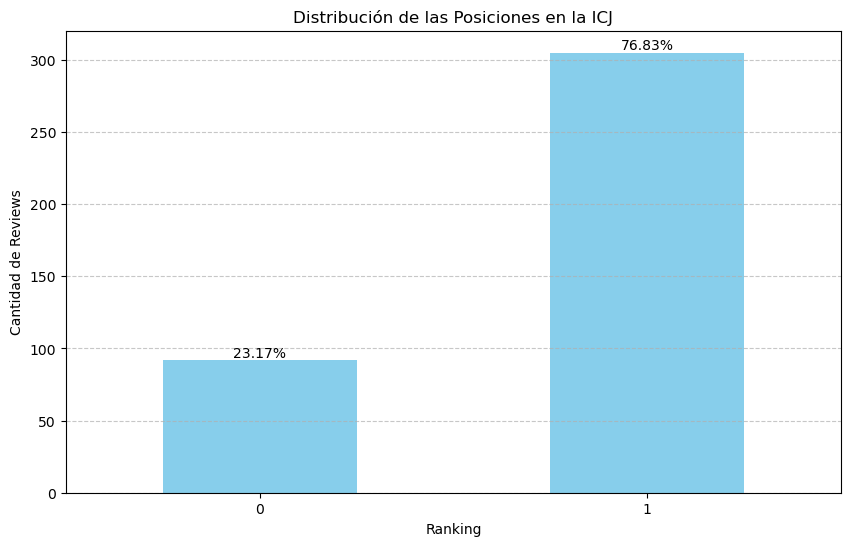

In [407]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los recuentos de cada valor de 'overall' y ordenar de menor a mayor
counts = df['voto'].value_counts().sort_index()

# Calcular los porcentajes
total_data = counts.sum()
porcentajes = [(count / total_data) * 100 for count in counts]

# Crear el histograma con los porcentajes en las etiquetas
plt.figure(figsize=(10, 6))
bars = counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de las Posiciones en la ICJ')
plt.xlabel('Ranking')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los porcentajes a las etiquetas de las barras
for i, patch in enumerate(bars.patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.05, f'{porcentajes[i]:.2f}%', ha='center', va='bottom')

# Mostrar los datos escritos
print("Distribución de las Posiciones en la ICJ:")
for ranking, count, percentage in zip(counts.index, counts, porcentajes):
    print(f'Ranking {ranking}: {count} Posiciones - {percentage:.2f}%')

plt.show()

### Recuento de votos a favor o en contra

In [408]:
# Reagrupar las categorías de la variable 'voto'
df['sentiment'] = df['voto'].apply(lambda x: 'Against' if x <= 0 else 'In Favour')
# Conteo de los valores de la nueva columna 'sentiment'
count_sentiment = df['sentiment'].value_counts()
print(count_sentiment)

sentiment
In Favour    305
Against       92
Name: count, dtype: int64


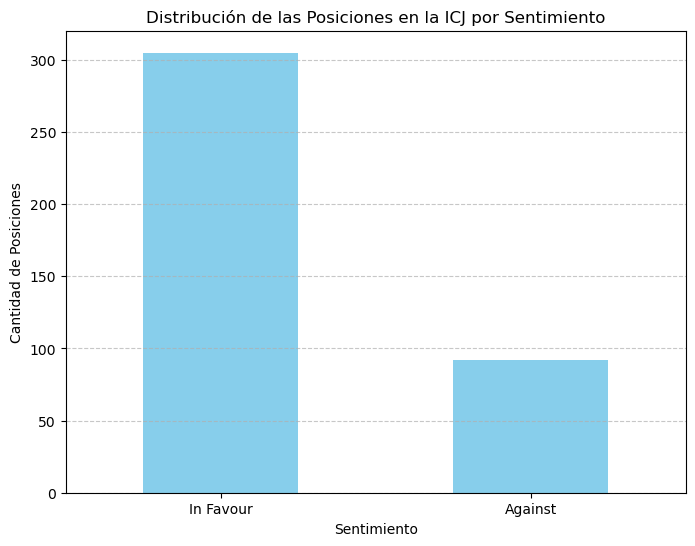

In [409]:
# Crear el histograma
plt.figure(figsize=(8, 6))
count_sentiment.plot(kind='bar', color='skyblue')
plt.title('Distribución de las Posiciones en la ICJ por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Posiciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### N-gramas más frecuentes

In [410]:
most_common = vocabulary_.most_common(10)
most_common

[('the', 59634),
 ('of', 32665),
 ('to', 19227),
 ('in', 15273),
 ('and', 15026),
 ('that', 9779),
 ('a', 7193),
 ('by', 5968),
 ('is', 5827),
 ('court', 5244)]

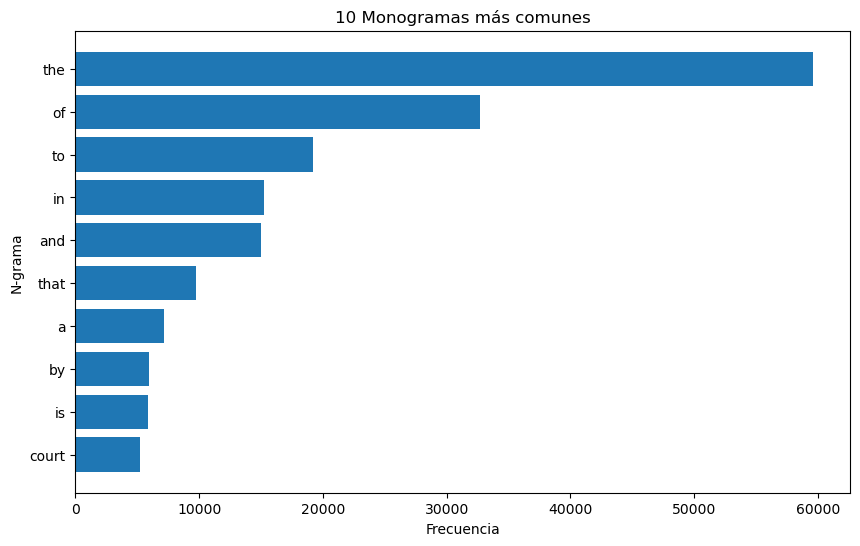

In [411]:
words_1_gram = [w[0] for w in most_common]  # result es el resultado obtenido de la función most_common_ngrams
freqs_1_gram = [w[1] for w in most_common]
freqs_1_gram, words_1_gram = zip(*sorted(zip(freqs_1_gram, words_1_gram)))

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.title("10 Monogramas más comunes")
plt.barh(words_1_gram[-10:], freqs_1_gram[-10:])  # Muestra solo las 10 palabras más comunes
plt.xlabel("Frecuencia")
plt.ylabel("N-grama")
plt.show()

### Bigramas

In [412]:
# Definir la función para calcular los N-gramas más frecuentes
def most_common_ngrams(text, n, num):
    # Obtener los N-gramas del texto
    n_grams = ngrams(text.split(), n)
    
    # Contar la frecuencia de cada N-grama
    n_gram_freq = Counter(n_grams)
    
    # Devolver los 'num' N-gramas más frecuentes
    return n_gram_freq.most_common(num)

# Ejemplo de uso
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 2  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes
result = most_common_ngrams(text, n, num)

# Mostrar los resultados
print(f"Los {num} N-gramas más frecuentes son:")
for n_gram, freq in result:
    print(f"{n_gram}: {freq} veces")

Los 10 N-gramas más frecuentes son:
('of', 'the'): 13728 veces
('to', 'the'): 4419 veces
('in', 'the'): 4370 veces
('the', 'Court'): 2983 veces
('that', 'the'): 2836 veces
('by', 'the'): 2186 veces
('on', 'the'): 2021 veces
('The', 'Court'): 1811 veces
('the', 'General'): 1797 veces
('and', 'the'): 1783 veces


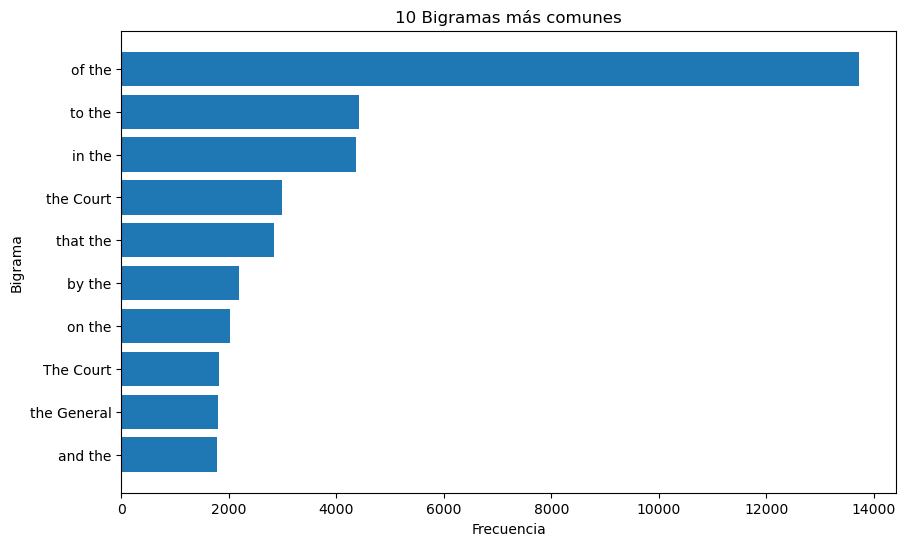

In [413]:
# Definir la función para calcular los bigramas más frecuentes
def most_common_bigrams(text, num):
    # Obtener los bigramas del texto
    bigrams = ngrams(text.split(), 2)
    
    # Contar la frecuencia de cada bigrama
    bigram_freq = Counter(bigrams)
    
    # Devolver los 'num' bigramas más frecuentes
    return bigram_freq.most_common(num)

# Ejemplo de uso
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
num = 10  # Número de bigramas más frecuentes a mostrar

# Obtener los bigramas más frecuentes
result = most_common_bigrams(text, num)

# Separar los resultados en palabras y frecuencias
words_bigram = [" ".join(map(str, w[0])) for w in result]
freqs_bigram = [w[1] for w in result]

# Ordenar los bigramas por frecuencia
freqs_bigram, words_bigram = zip(*sorted(zip(freqs_bigram, words_bigram)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(words_bigram, freqs_bigram)
plt.title("10 Bigramas más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.show()

### Trigramas

In [414]:
# Definir la función para calcular los N-gramas más frecuentes
def most_common_ngrams(text, n, num):
    # Obtener los N-gramas del texto
    n_grams = ngrams(text.split(), n)
    
    # Contar la frecuencia de cada N-grama
    n_gram_freq = Counter(n_grams)
    
    # Devolver los 'num' N-gramas más frecuentes
    return n_gram_freq.most_common(num)

# Ejemplo de uso
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 3  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes
result = most_common_ngrams(text, n, num)

# Mostrar los resultados
print(f"Los {num} N-gramas más frecuentes son:")
for n_gram, freq in result:
    print(f"{n_gram}: {freq} veces")

Los 10 N-gramas más frecuentes son:
('construction', 'of', 'the'): 1583 veces
('of', 'the', 'wall'): 1413 veces
('the', 'Occupied', 'Palestinian'): 1401 veces
('the', 'construction', 'of'): 1395 veces
('the', 'General', 'Assembly'): 1288 veces
('the', 'United', 'Nations'): 997 veces
('in', 'the', 'Occupied'): 973 veces
('of', 'the', 'United'): 840 veces
('the', 'Fourth', 'Geneva'): 691 veces
('the', 'Security', 'Council'): 583 veces


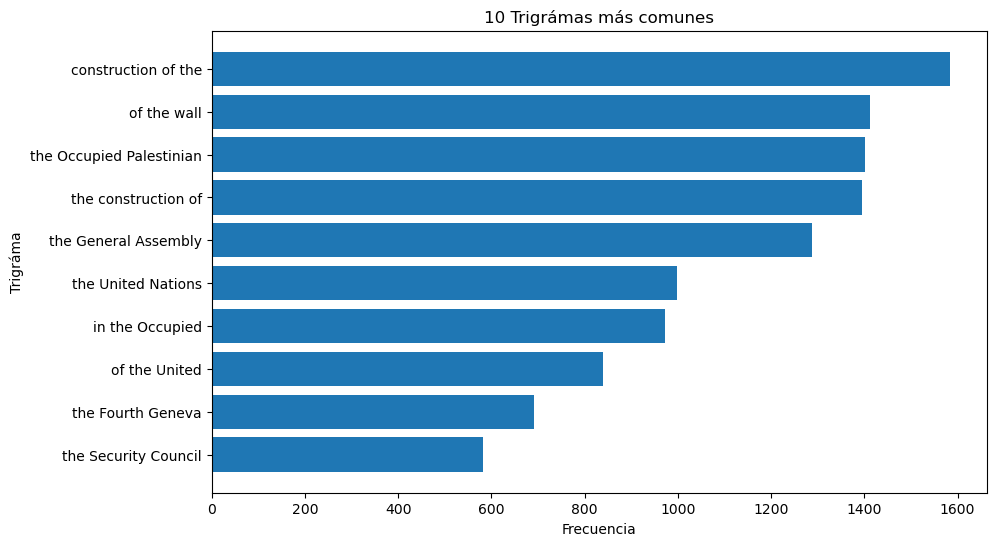

In [415]:
# Definir la función para calcular los trigrámas más frecuentes
def most_common_trigrams(text, num):
    # Obtener los trigrámas del texto
    trigrams = ngrams(text.split(), 3)
    
    # Contar la frecuencia de cada trigrama
    trigram_freq = Counter(trigrams)
    
    # Devolver los 'num' trigrámas más frecuentes
    return trigram_freq.most_common(num)

# Ejemplo de uso
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
num = 10  # Número de trigrámas más frecuentes a mostrar

# Obtener los trigrámas más frecuentes
result = most_common_trigrams(text, num)

# Separar los resultados en palabras y frecuencias
words_trigram = [" ".join(map(str, w[0])) for w in result]
freqs_trigram = [w[1] for w in result]

# Ordenar los trigrámas por frecuencia
freqs_trigram, words_trigram = zip(*sorted(zip(freqs_trigram, words_trigram)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(words_trigram, freqs_trigram)
plt.title("10 Trigrámas más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Trigráma")
plt.show()

Al validar la información obtenida a través de los n-gramas representados anteriormente, se destaca que la mayoría de las palabras representadas son stopwords. Esto dificulta la generación de un contexto claro para el significado de los n-gramas mediante la función de frecuencia. Por esta razón, decidí excluir las stopwords al calcular los n-gramas más frecuentes, ya que estas palabras suelen introducir ruido en el análisis al carecer de un significado contextual relevante. Al eliminarlas, espero poder enfocarnos en las palabras más relevantes dentro del conjunto de datos seleccionado.

### Los N-gramas más frecuentes, excluyendo las stopwords.

In [416]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Definir la función para calcular los N-gramas más frecuentes excluyendo stopwords
def most_common_ngrams(text, n, num):
    # Obtener las stopwords en el idioma inglés
    stop_words = set(stopwords.words('english'))
    
    # Obtener los N-gramas del texto excluyendo las stopwords
    words = [word for word in text.split() if word.lower() not in stop_words]
    n_grams = ngrams(words, n)
    
    # Contar la frecuencia de cada N-grama
    n_gram_freq = Counter(n_grams)
    
    # Devolver los 'num' N-gramas más frecuentes
    return n_gram_freq.most_common(num)

Monograma excluyendo stopwords

In [417]:
# Monogramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 1  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes excluyendo stopwords
result = most_common_ngrams(text, n, num)

# Mostrar los resultados
print(f"Los {num} N-gramas más frecuentes (excluyendo stopwords) son:")
for n_gram, freq in result:
    print(f"{n_gram}: {freq} veces")

Los 10 N-gramas más frecuentes (excluyendo stopwords) son:
('Court',): 5215 veces
('Israel',): 3309 veces
('international',): 2977 veces
('Palestinian',): 2839 veces
('General',): 2139 veces
('construction',): 2121 veces
('United',): 1966 veces
('legal',): 1897 veces
('Article',): 1827 veces
('wall',): 1804 veces


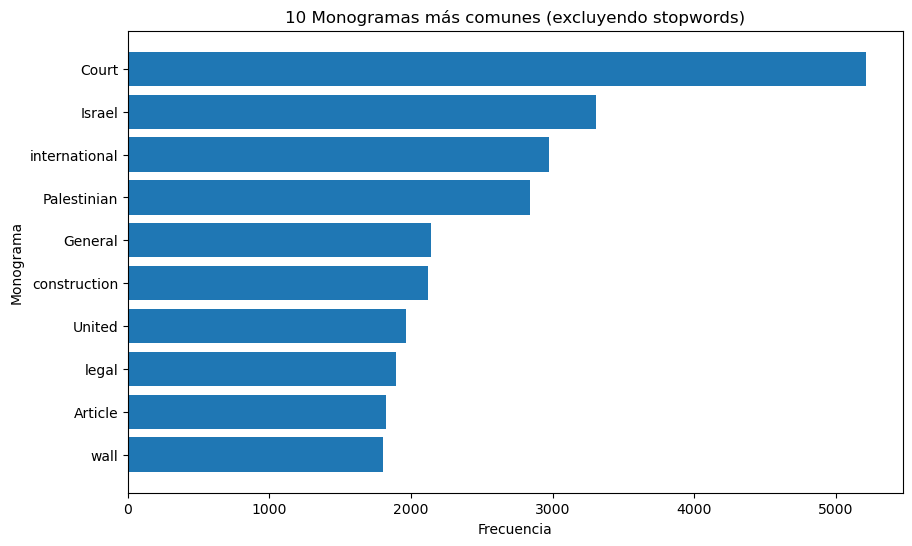

In [418]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Definir la función para calcular los N-gramas más frecuentes excluyendo stopwords
def most_common_ngrams(text, n, num):
    # Obtener los N-gramas del texto excluyendo stopwords
    tokens = [token for token in text.split() if token.lower() not in stopwords.words('english')]
    n_grams = ngrams(tokens, n)
    
    # Contar la frecuencia de cada N-grama
    n_gram_freq = Counter(n_grams)
    
    # Devolver los 'num' N-gramas más frecuentes
    return n_gram_freq.most_common(num)

# Monogramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 1  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes excluyendo stopwords
result = most_common_ngrams(text, n, num)

# Separar los resultados en palabras y frecuencias
words = [n_gram[0][0] for n_gram in result]
freqs = [n_gram[1] for n_gram in result]

# Ordenar los N-gramas por frecuencia
freqs, words = zip(*sorted(zip(freqs, words)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(words, freqs)
plt.title("10 Monogramas más comunes (excluyendo stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Monograma")
plt.show()

Bigrama excluyendo stopwords

In [419]:
# Bigramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 2  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes excluyendo stopwords
result = most_common_ngrams(text, n, num)

# Mostrar los resultados
print(f"Los {num} N-gramas más frecuentes (excluyendo stopwords) son:")
for n_gram, freq in result:
    print(f"{n_gram}: {freq} veces")

Los 10 N-gramas más frecuentes (excluyendo stopwords) son:
('General', 'Assembly'): 1548 veces
('Occupied', 'Palestinian'): 1408 veces
('construction', 'wall'): 1208 veces
('United', 'Nations'): 1201 veces
('Security', 'Council'): 972 veces
('advisory', 'opinion'): 888 veces
('Fourth', 'Geneva'): 710 veces
('legal', 'consequences'): 633 veces
('Geneva', 'Convention'): 598 veces
('international', 'law'): 561 veces


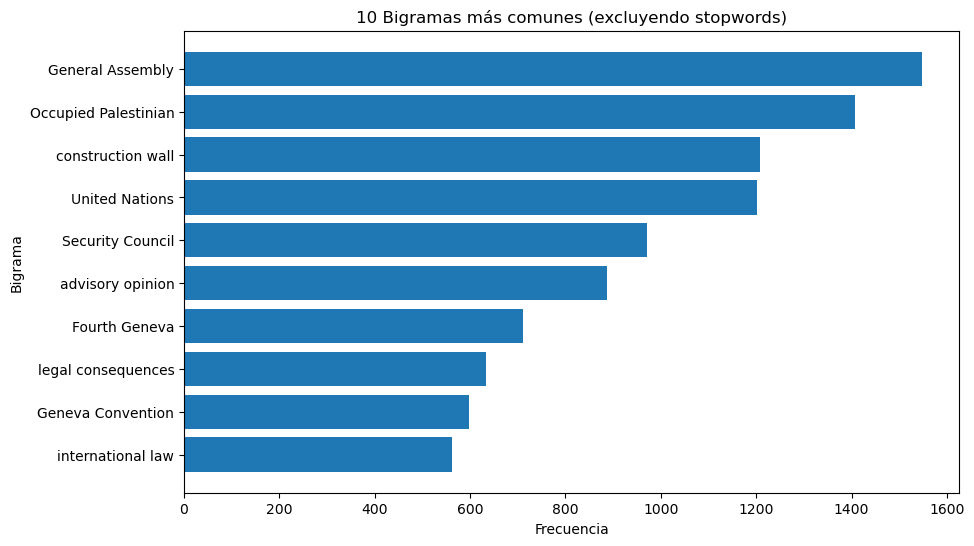

In [420]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Definir la función para calcular los bigramas más frecuentes excluyendo stopwords
def most_common_bigrams(text, num):
    # Obtener los bigramas del texto excluyendo stopwords
    tokens = [token for token in text.split() if token.lower() not in stopwords.words('english')]
    bigrams = ngrams(tokens, 2)
    
    # Contar la frecuencia de cada bigrama
    bigram_freq = Counter(bigrams)
    
    # Devolver los 'num' bigramas más frecuentes
    return bigram_freq.most_common(num)

# Bigramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
num = 10  # Número de bigramas más frecuentes a mostrar

# Obtener los bigramas más frecuentes excluyendo stopwords
result = most_common_bigrams(text, num)

# Separar los resultados en palabras y frecuencias
words_bigram = [" ".join(map(str, w[0])) for w in result]
freqs_bigram = [w[1] for w in result]

# Ordenar los bigramas por frecuencia
freqs_bigram, words_bigram = zip(*sorted(zip(freqs_bigram, words_bigram)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(words_bigram, freqs_bigram)
plt.title("10 Bigramas más comunes (excluyendo stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.show()

Trigrama excluyendo stopwords

In [421]:
# Trigramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
n = 3  # Número de palabras por N-grama
num = 10  # Número de N-gramas más frecuentes a mostrar

# Obtener los N-gramas más frecuentes excluyendo stopwords
result = most_common_ngrams(text, n, num)

# Mostrar los resultados
print(f"Los {num} trigrámas más frecuentes (excluyendo stopwords) son:")
for n_gram, freq in result:
    print(f"{n_gram}: {freq} veces")

Los 10 trigrámas más frecuentes (excluyendo stopwords) son:
('wall', 'Occupied', 'Palestinian'): 507 veces
('Occupied', 'Palestinian', 'Territory,'): 500 veces
('Fourth', 'Geneva', 'Convention'): 481 veces
('Occupied', 'Palestinian', 'Territory'): 475 veces
('construction', 'wall', 'Occupied'): 443 veces
('C.', 'J.', 'Reports'): 429 veces
('Occupied', 'Palestinian', 'Territory.'): 353 veces
('Palestinian', 'Territory,', 'including'): 334 veces
('I.', 'C.', 'J.'): 323 veces
('international', 'humanitarian', 'law'): 288 veces


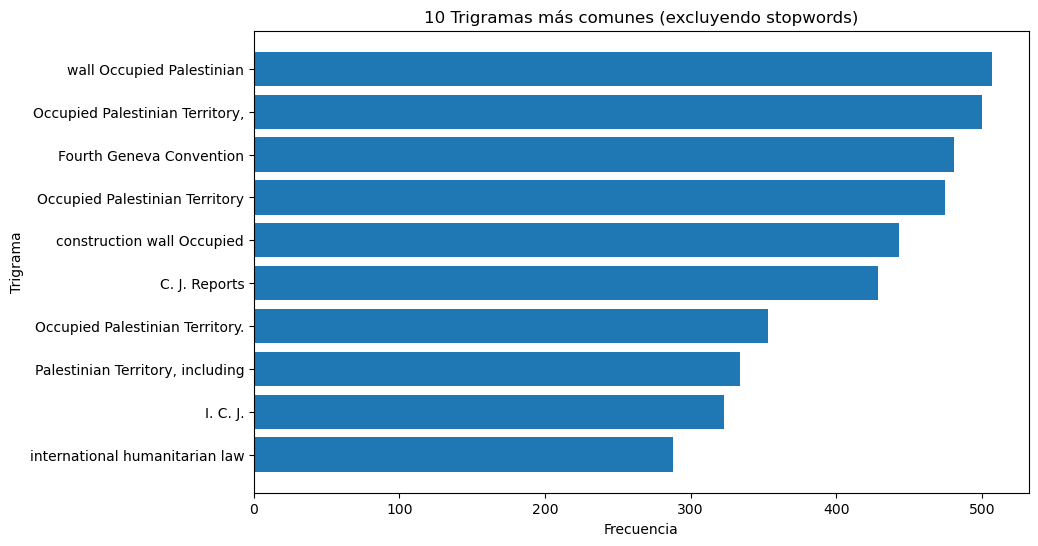

In [422]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Definir la función para calcular los trigramas más frecuentes excluyendo stopwords
def most_common_trigrams(text, num):
    # Obtener los trigramas del texto excluyendo stopwords
    tokens = [token for token in text.split() if token.lower() not in stopwords.words('english')]
    trigrams = ngrams(tokens, 3)
    
    # Contar la frecuencia de cada trigram
    trigram_freq = Counter(trigrams)
    
    # Devolver los 'num' trigramas más frecuentes
    return trigram_freq.most_common(num)

# Trigramas más Frecuentes
text = " ".join(df['texto'])  # Concatenar todos los textos en una cadena
num = 10  # Número de trigramas más frecuentes a mostrar

# Obtener los trigramas más frecuentes excluyendo stopwords
result = most_common_trigrams(text, num)

# Separar los resultados en palabras y frecuencias
words_trigram = [" ".join(map(str, w[0])) for w in result]
freqs_trigram = [w[1] for w in result]

# Ordenar los trigramas por frecuencia
freqs_trigram, words_trigram = zip(*sorted(zip(freqs_trigram, words_trigram)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(words_trigram, freqs_trigram)
plt.title("10 Trigramas más comunes (excluyendo stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Trigrama")
plt.show()

Como se puede apreciar en el conjunto de n-gramas representado anteriormente, existe un contexto más amplio sobre el mensaje que la revisión busca transmitir. En esta misma línea, considero que la aplicación de este método resulta muy útil para identificar el comportamiento del conjunto de datos y su sentido contextual.

### Nubes de Palabras

Nube de palabras generada a partir de todas las muestras de reseñas.

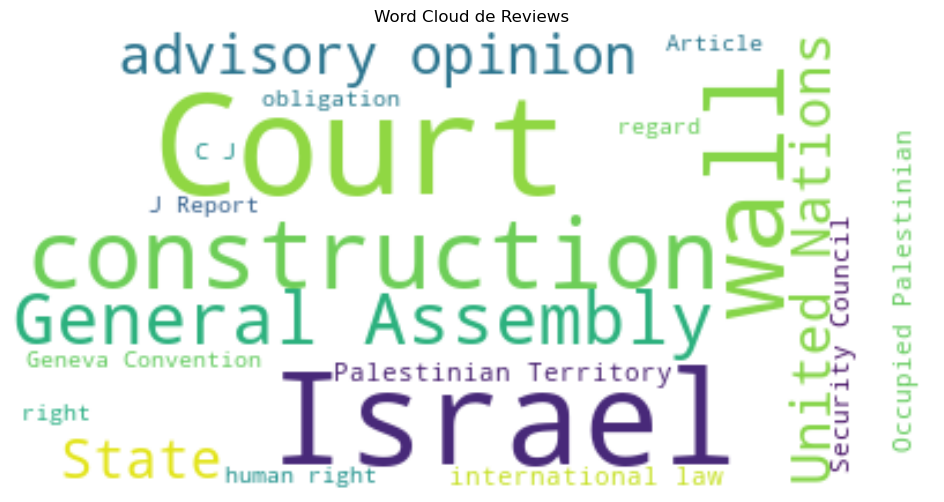

In [423]:
# Concatenar todos los textos en una sola cadena
text = " ".join(df['texto'])

# Crear un objeto WordCloud
wordcloud = WordCloud(max_font_size=60, max_words=20, background_color='white', colormap='viridis').generate(text)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews')
plt.show()

Nube de palabras generada a partir de todas las muestras de reseñas negativas

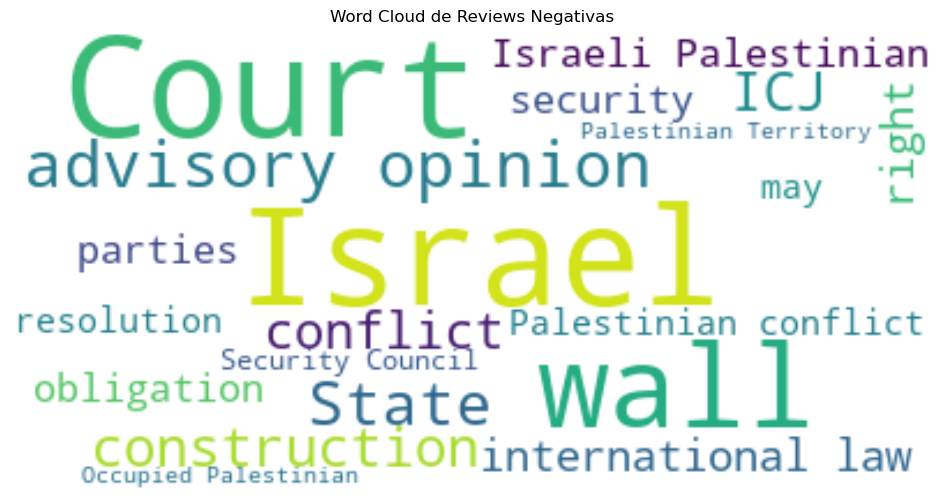

In [424]:
# Filtrar solo los textos de las reviews con sentimiento negativo
negative_reviews = df[df['sentiment'] == 'Against']['texto']

# Concatenar todos los textos en una sola cadena
text = " ".join(negative_reviews)

# Crear un objeto WordCloud
wordcloud = WordCloud(max_font_size=60, max_words=20, background_color='white', colormap='viridis').generate(text)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews Negativas')
plt.show()

Nube de palabras generada a partir de todas las muestras de reseñas positivas

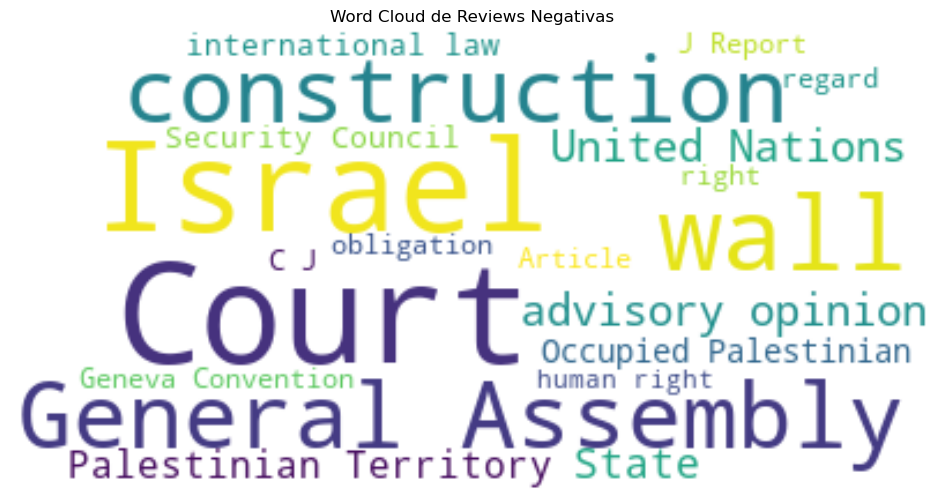

In [425]:
# Filtrar solo los textos de las reviews con sentimiento negativo
negative_reviews = df[df['sentiment'] == 'In Favour']['texto']

# Concatenar todos los textos en una sola cadena
text = " ".join(negative_reviews)

# Crear un objeto WordCloud
wordcloud = WordCloud(max_font_size=60, max_words=20, background_color='white', colormap='viridis').generate(text)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews Negativas')
plt.show()

### Pipeline

Creamos una función (nltk_cleaner) que limpia el texto de entrada, eliminando acentos, signos de puntuación, palabras vacías (stop words), y convirtiendo dígitos a palabras. Utiliza herramientas de procesamiento de lenguaje natural (NLTK) como tokenizadores, lista de palabras vacías y lematizadores para realizar estas tareas.

In [426]:
tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def nltk_cleaner(text, tokenizer = tokenizer, sw_list = sw_list, lemmatizer = lemmatizer):
    clean_text = list()

    # Eliminar acentos, etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):

        # Eliminar stop words
        if word not in sw_list:

        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
            clean_word = lemmatizer.lemmatize(word).lower().strip()

        # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)

    return ' '.join(clean_text)

In [427]:
 df.head()

,voto,juez,pregunta,texto,sentiment
0,1,Shi,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
1,1,Ranjeva,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
2,1,Guillaume,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
3,1,Koroma,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
4,1,Vereshchetin,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour


Procedemos a realizar una copia del dataframe llamada df_partition_nltk y creamos una nueva columna llamada "nltk" para almacenar los datos parcialmente limpios.

In [428]:
# Copiar df_partition para no modificar el original
df_nltk = df.copy()
# Crear la nueva columna 'preprocesado'
df_nltk['nltk'] = df_nltk['texto'].apply(nltk_cleaner)

Validamos la correcta creación de la columna con la información tratada.

In [429]:
 df_nltk.head()

,voto,juez,pregunta,texto,sentiment,nltk
0,1,Shi,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour,question finds jurisdiction give advisory opin...
1,1,Ranjeva,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour,question finds jurisdiction give advisory opin...
2,1,Guillaume,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour,question finds jurisdiction give advisory opin...
3,1,Koroma,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour,question finds jurisdiction give advisory opin...
4,1,Vereshchetin,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour,question finds jurisdiction give advisory opin...


### Visualización en dos dimensiones de algunos word embeddings calculados con Word2Vec

Definimos los parámetros del modelo Word2Vec, inicializa el modelo Word2Vec con los parámetros especificados, construye el vocabulario utilizando los datos de texto preprocesados y muestra la cantidad de palabras en el vocabulario resultante.

In [430]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import numpy as np

In [431]:
corpus = df_nltk['nltk'] .str.split()

In [432]:
# Definir parámetros
parametros = {
    'vector_size': 200,
    'window': 5,
    'min_count': 1,
    'sg': 1,
    'workers': 4
}
# Inicializar modelo Word2Vec
Word2Vec_sg = Word2Vec(**parametros)

# Construir el vocabulario
Word2Vec_sg.build_vocab(corpus)

# Imprimir la cantidad de palabras en el vocabulario
print('El vocabulario está compuesto por {} palabras'.format(len(Word2Vec_sg.wv.key_to_index)))

El vocabulario está compuesto por 7323 palabras


Por ultimo entrenamos el modelo Word2Vec utilizando el corpus cargado en memoria durante 10 épocas.

In [433]:
# Entrenar el modelo Word2Vec con el corpus cargado en memoria
Word2Vec_sg.train(corpus_iterable=corpus, total_examples=Word2Vec_sg.corpus_count, epochs=10)

(3186203, 3870740)

Luego, guardamos el modelo Word2Vec entrenado en un archivo llamado "w2v_sg_model.pkl" y ofrecemos un método para cargar el modelo previamente guardado desde ese archivo.

In [434]:
#Por si queremos guardar el modelo
Word2Vec_sg.save('./w2v_sg_model.pkl')

In [435]:
# Para cargar un modelo guardado
Word2Vec_sg = Word2Vec.load('./w2v_sg_model.pkl')

Realizamos una validación del modelo utilizando la función print_sim_words, la cual imprime las palabras más similares a una palabra dada según el modelo Word2Vec especificado. Luego, probamos esta función con una lista de palabras predefinidas, mostrando las palabras más similares a cada una de ellas según el modelo.

Estras son las dos preguntas actuales enviadas a la ICJ vamos a usarlas para hacer el test:
    
(a)What are the legal consequences arising from the ongoing violation by 
Israel of the right of the Palestinian people to self-determination, from its prolonged 
occupation, settlement and annexation of the Palestinian territory occupied since 
1967, including measures aimed at altering the demographic composition, character 
and status of the Holy City of Jerusalem, and from its adoption of related 
discriminatory legislation and measures? 

(b) How do the policies and practices of Israel referred to in paragraph 18 (a) 
above affect the legal status of the occupation, and what are the legal consequences 
that arise for all States and the United Nations from this status?

In [436]:
import re
from nltk.corpus import stopwords
from collections import Counter

# Texto proporcionado
texto = """
What are the legal consequences arising from the ongoing violation by Israel of the right of the Palestinian people to self-determination, from its prolonged occupation, settlement and annexation of the Palestinian territory occupied since 1967, including measures aimed at altering the demographic composition, character and status of the Holy City of Jerusalem, and from its adoption of related discriminatory legislation and measures?

How do the policies and practices of Israel referred to in paragraph 18 (a) above affect the legal status of the occupation, and what are the legal consequences that arise for all States and the United Nations from this status?
"""

# Función para limpiar el texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Remover signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Separar el texto en palabras
    palabras = texto.split()
    # Eliminar stopwords
    stopwords_english = stopwords.words('english')
    palabras = [palabra for palabra in palabras if palabra not in stopwords_english]
    return palabras

# Limpieza del texto
palabras_limpias = limpiar_texto(texto)

# Palabras únicas
palabras_unicas = set(palabras_limpias)

# Resultados
print("Palabras únicas después de limpiar el texto:")
print(palabras_unicas)


Palabras únicas después de limpiar el texto:
{'related', 'jerusalem', 'discriminatory', 'consequences', 'since', 'referred', 'arise', 'territory', 'legal', 'right', 'character', 'arising', 'including', 'status', 'people', 'states', 'altering', 'practices', 'demographic', 'paragraph', 'israel', 'measures', 'legislation', 'city', 'ongoing', 'prolonged', 'settlement', 'palestinian', 'adoption', 'united', 'nations', 'policies', 'occupied', 'aimed', 'holy', 'composition', 'occupation', 'violation', 'annexation', 'selfdetermination', '18', '1967', 'affect'}


In [437]:
def print_sim_words(word, model):
    query = "Most similar to {}".format(word) 
    print(query)
    print("-"*len(query))
    
    for sim_word, sim_score in model.wv.most_similar(word):
        print("{}:{}{:.3f}".format(sim_word, " "*(20-len(sim_word)), sim_score))
    
    print("\n")

words_to_test = ['occupied',   'right',   'israel', 'affect', 'states', 'violation',  'jerusalem', 'consequences', 'adoption', 'palestinian']

for word in words_to_test:
    print_sim_words(word, Word2Vec_sg)

Most similar to occupied
------------------------
territory:           0.664
palestinian:         0.482
pursued:             0.482
departing:           0.458
bank35:              0.453
sipv:                0.452
cancel:              0.451
reinforcing:         0.451
si19971199:          0.448
engineering:         0.448


Most similar to demographic
---------------------------
composition:         0.896
altering:            0.744
alteration:          0.715
tending:             0.712
engineering:         0.667
contributing:        0.661
backed:              0.654
characteristic:      0.619
alter:               0.617
geographical:        0.616


Most similar to right
---------------------
footing:             0.541
infringed:           0.529
realm:               0.515
negates:             0.504
flagrantly:          0.499
infringes:           0.492
exacerbates:         0.487
self:                0.479
nunder:              0.479
routinely:           0.477


Most similar to israel
-----------

La salida del modelo Word2Vec proporciona información valiosa sobre las relaciones semánticas entre las palabras en un corpus de texto específico, lo que puede ser útil para tareas como el análisis de texto, la recuperación de información y la comprensión del lenguaje natural.

Genera una visualización de los clusters de palabras en un espacio bidimensional.

In [438]:
# Definir las palabras clave para visualización
keys = ['occupied',   'right',   'israel', 'affect', 'states', 'violation',  'jerusalem', 'consequences', 'adoption', 'palestinian']

# Preparar las listas de embeddings y palabras
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in Word2Vec_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(Word2Vec_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
print(word_clusters) 

[['territory', 'palestinian', 'pursued', 'departing', 'bank35', 'sipv', 'cancel', 'reinforcing', 'si19971199', 'engineering'], ['composition', 'altering', 'alteration', 'tending', 'engineering', 'contributing', 'backed', 'characteristic', 'alter', 'geographical'], ['footing', 'infringed', 'realm', 'negates', 'flagrantly', 'infringes', 'exacerbates', 'self', 'nunder', 'routinely'], ['meant', 'revert', 'coercing', 'receipt', 'embarked', 'wall44', 'peo', 'strong', 'liability', 'indolent'], ['incorporation', 'expropriation', 'thereon', 'backed', 'punitive', 'oppressive', 'eviction', 'tend', 'totally', 'tax'], ['disarmament', 'adversely', 'rafah', 'agent', 'inflaming', 'purporting', 'enjoyment', 'struck', 'engineer', 'minimal'], ['prosecute', 'offender', 'extradite', 'specialized', 'concedes', 'author', 'articulated', 'america', 'nregarding', 'cumaraswamy'], ['norma', 'violative', 'flagrant', 'incur', 'peremptory', 'distinguishing', 'prescription', 'expeditiously', 'ius', 'adjudged'], ['cit

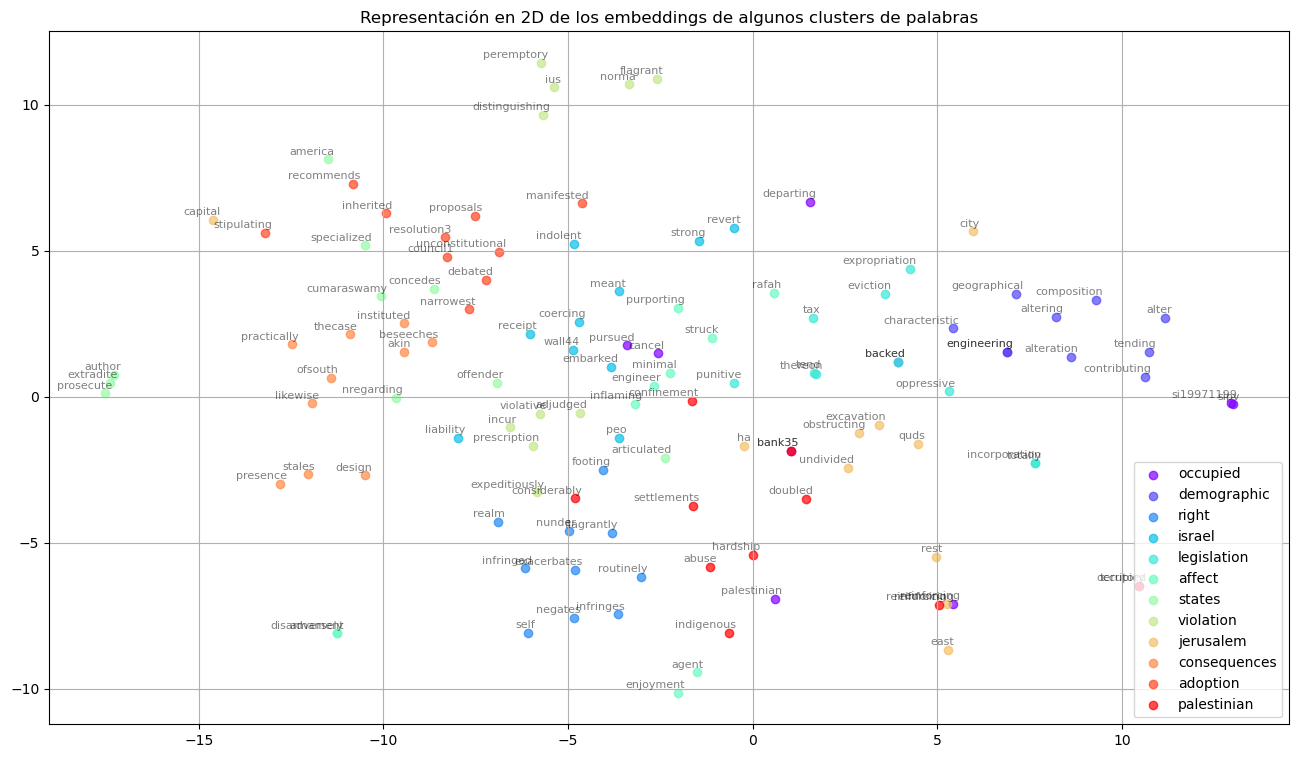

In [439]:
# Función para visualizar los clusters de palabras en 2D
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    plt.show()



# Configurar y ajustar el modelo t-SNE
model_2D = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=69)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

embeddings_2d = np.array(model_2D.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

# Visualizar los clusters de palabras
tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

### 2. Etapa de procesado de texto

Librerías, Configuración Librerias Requeridos Procesado de Texto

In [440]:
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import unicodedata
from num2words import num2words
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Procesado de Texto

Procedemos a inicializar el lematizador de WordNet y reinicia los índices del DataFrame antes de continuar con el procesamiento de los datos.

In [441]:
# Inicializar el lematizador de WordNet
lemmatizer = WordNetLemmatizer()
#Se ha decidido reiniciar los índices antes de continuar con el procesamiento de los datos.
df.reset_index(drop=True, inplace=True) 

Validamos los datos previo al procesamiento.

In [442]:
# Revisión
texto = df['texto'][1]
texto

'Question: Finds that it has jurisdiction to give the advisory opinion requested. /n/n13. When seised of a request for an advisory opinion, the Court must first consider whether it has jurisdiction to give the opinion requested and whether, should the answer be in the affirmative, there is any reason why it should decline to exercise any such jurisdiction (see Legality of the Threat or Use of Nuclear Weapons, Advisory Opinion, I. C. J. Reports 1996 (1), p. 232, para. 10).\n\n14. The Court will thus first address the question whether it possesses jurisdiction to give the advisory opinion requested by the General Assembly on 8 December 2003. The competence of the Court in this regard is based on Article 65, paragraph l, of its Statute, according to which the Court, according to which the Court "may give an advisory opinion on any legal question at the request of whatever body may be authorized by or in accordance with the Charter of the United Nations to make such a request". The Court h

In [443]:
df.head()

,voto,juez,pregunta,texto,sentiment
0,1,Shi,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
1,1,Ranjeva,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
2,1,Guillaume,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
3,1,Koroma,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour
4,1,Vereshchetin,Finds that it has jurisdiction to give the adv...,Question: Finds that it has jurisdiction to gi...,In Favour


Hemos desarrollado las funciones siguientes: nltk_cleaner, encargada de limpiar el texto de entrada eliminando acentos, caracteres especiales, signos de puntuación, stopwords y lematizando las palabras; y data_cleaner, que aplica nltk_cleaner a una lista de textos y devuelve una lista de textos limpios.

In [444]:
# Inicializar tokenizador, lista de palabras vacías y lematizador
tokenizer = RegexpTokenizer(r'\w+')
sw_list = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    clean_text = []
    
    # Manejo de excepciones para texto nulo
    if not text:
        return ''
    
    # Eliminar acentos y caracteres especiales
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Separar palabras eliminando signos de puntuación y limpiar cada palabra
    for word in tokenizer.tokenize(text):
        # Eliminar stop words y lematizar las palabras
        clean_word = lemmatizer.lemmatize(word.lower().strip())
        
        # Convertir dígitos a palabras
        if clean_word.isdigit():
            clean_word = num2words(clean_word, lang='en')
        
        # Agregar palabra si no es una palabra vacía
        if clean_word not in sw_list:
            clean_text.append(clean_word)
            
    return ' '.join(clean_text)

def data_cleaner(text_list, tokenizer, sw_list, lemmatizer):
    cleaned_texts = []
    for text in text_list:
        cleaned_text = nltk_cleaner(text, tokenizer, sw_list, lemmatizer)
        cleaned_texts.append(cleaned_text)
    return cleaned_texts

Procedemos a procesar los textos utilizando las funciones mencionadas anteriormente y los almacenamos en la variable data_processed.

In [445]:
data_processed = data_cleaner(df['texto'], tokenizer, sw_list, lemmatizer)

Antes del procesamiento:

In [446]:
df['texto'][1]

'Question: Finds that it has jurisdiction to give the advisory opinion requested. /n/n13. When seised of a request for an advisory opinion, the Court must first consider whether it has jurisdiction to give the opinion requested and whether, should the answer be in the affirmative, there is any reason why it should decline to exercise any such jurisdiction (see Legality of the Threat or Use of Nuclear Weapons, Advisory Opinion, I. C. J. Reports 1996 (1), p. 232, para. 10).\n\n14. The Court will thus first address the question whether it possesses jurisdiction to give the advisory opinion requested by the General Assembly on 8 December 2003. The competence of the Court in this regard is based on Article 65, paragraph l, of its Statute, according to which the Court, according to which the Court "may give an advisory opinion on any legal question at the request of whatever body may be authorized by or in accordance with the Charter of the United Nations to make such a request". The Court h

Despues del proceamiento:

In [447]:
data_processed[1]

'question find ha jurisdiction give advisory opinion requested n n13 seised request advisory opinion court must first consider whether ha jurisdiction give opinion requested whether answer affirmative reason decline exercise jurisdiction see legality threat use nuclear weapon advisory opinion c j report one thousand, nine hundred and ninety-six one p two hundred and thirty-two para ten fourteen court thus first address question whether posse jurisdiction give advisory opinion requested general assembly eight december two thousand and three competence court regard based article sixty-five paragraph l statute according court according court may give advisory opinion legal question request whatever body may authorized accordance charter united nation make request court ha already occasion indicate precondition court competence advisory opinion requested organ duly authorized seek charter requested legal question except case general assembly security council question one arising within sco

### 3. Entrenamiento y Evaluación de un Modelo de Análisis de Sentimientos

Librerías, Configuración Librerias Requeridos en el Entrenamiento y Evaluacion del Modelo de Análisis de Sentimientos

In [448]:
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

import matplotlib.pyplot as plt

Procedemos a divider los datos procesados y las etiquetas de sentimiento en conjuntos de entrenamiento y prueba, utilizando una proporción del 75% para entrenamiento y 25% para prueba. Se establece una semilla para la aleatorización y se indica que los datos deben ser mezclados antes de la división.

In [449]:
X_train, X_test, y_train, y_test = train_test_split(data_processed, df['sentiment'], train_size=0.75, test_size=0.25, random_state=69, shuffle=True)

Accedemos a los primeros 10 elementos del conjunto de entrenamiento X_train.

In [450]:
X_train[:10]

['moreover well established court enjoys discretionary power provide advisory opinion decline compelling reason ha never happened ireland view happen n na argument advanced court narrow question request advice regarding role general assembly promoting resolution conflict within established negotiating framework however court ha previously rejected similar submission holding court purport decide whether advisory opinion needed assembly performance function general assembly ha right decide usefulness opinion light need n nwe agree therefore ruling court would undermine established negotiating framework contrary court authoritative clarification important legal issue raised would provide essential foundation upon build lasting comprehensive resolution israeli palestinian conflict',
 '',
 'first matter jurisdiction competence small number state objecting court exercise jurisdiction variously argued request politically motivated instrumentalizes court circumvents consent israel cover vast s

In [451]:
y_train[:10]

264    In Favour
275    In Favour
228    In Favour
143    In Favour
27     In Favour
91     In Favour
26     In Favour
172      Against
70     In Favour
349      Against
Name: sentiment, dtype: object

Inicializamos un vectorizador TF-IDF con parámetros específicos, incluyendo el rango de n-gramas de 1 a 3, eliminación de acentos, umbral de frecuencia máxima de documento de 0.95, umbral de frecuencia mínima de documento de 3, y un límite máximo de características de 3000. Luego, el vectorizador se ajusta al conjunto de entrenamiento X_train.

In [452]:
cv = TfidfVectorizer(ngram_range=(1, 3), strip_accents='ascii', max_df=0.95, min_df=3, max_features=3000)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=3000, min_df=3, ngram_range=(1, 3),
                strip_accents='ascii')

In [453]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

Ahora aplicaremos regresión logística para ajustar el modelo, utilizando diferentes valores de parámetro de regularización. Calcularemos y registraremos la precisión de cada modelo en los conjuntos de entrenamiento y prueba, y luego imprimiremos los resultados de precisión para cada valor de C.

In [454]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = []
test_acc = []

for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=5000)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))
    
    print("Accuracy for C={}: Train - {:.3f}, Test - {:.3f}".format(c, train_acc[-1], test_acc[-1]))

Accuracy for C=0.01: Train - 0.761, Test - 0.790
Accuracy for C=0.05: Train - 0.761, Test - 0.790
Accuracy for C=0.25: Train - 0.842, Test - 0.850
Accuracy for C=0.5: Train - 0.896, Test - 0.870
Accuracy for C=1: Train - 0.923, Test - 0.900
Accuracy for C=10: Train - 0.976, Test - 0.900
Accuracy for C=100: Train - 0.983, Test - 0.900
Accuracy for C=1000: Train - 0.983, Test - 0.930
Accuracy for C=10000: Train - 0.983, Test - 0.930


### Matriz de confusión

In [455]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))

Confussion matrix:
[[14  7]
 [ 0 79]]


In [456]:
conf_matrix = confusion_matrix(y_test, test_predict)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print('Confusion matrix (in %):\n{}'.format(conf_matrix_percent))

Confusion matrix (in %):
[[ 66.66666667  33.33333333]
 [  0.         100.        ]]


### Informe de clasificación

In [457]:
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))


Classification report:
              precision    recall  f1-score   support

     Against       1.00      0.67      0.80        21
   In Favour       0.92      1.00      0.96        79

    accuracy                           0.93       100
   macro avg       0.96      0.83      0.88       100
weighted avg       0.94      0.93      0.92       100



### Puntaje de precisión del modelo

In [458]:
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Accuracy score:0.93


### Gráfico que muestra cómo evoluciona la precisión del modelo

El gráfico muestra cómo evoluciona la precisión del modelo en los conjuntos de entrenamiento y prueba en función de diferentes valores de C utilizados en la regresión logística. La línea punteada verde indica el valor de C que maximiza la precisión en el conjunto de prueba.

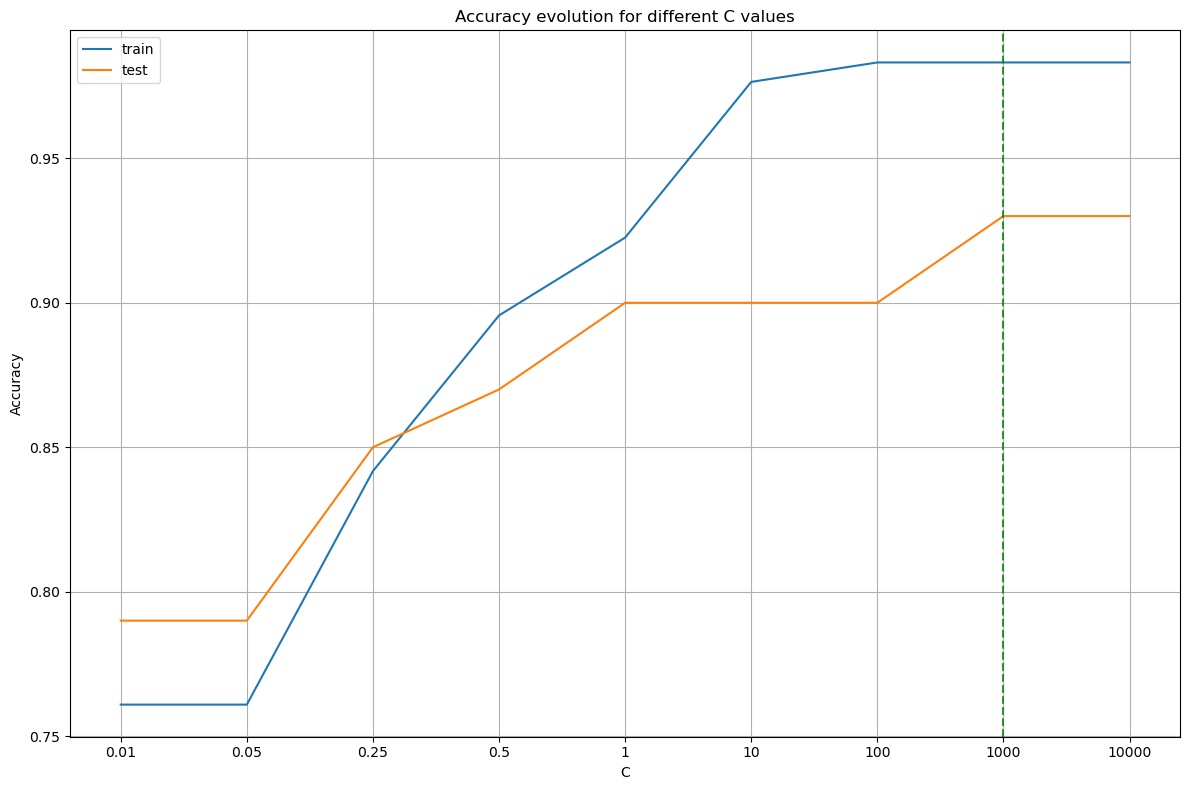

In [459]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

### Modelo de Clasificación Gradient Boosting

Vamos a entrenar un modelo de clasificación Gradient Boosting y evalúa su precisión en los conjuntos de entrenamiento y prueba.

In [460]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 32

def classify_gboost(X_train, X_test, y_train, y_test):        
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=42)

    clf.fit(X_train, y_train)
    
    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)))
    
    return clf


clf2 = classify_gboost(X_train_, X_test_, y_train, y_test)

[GradientBoostingClassifier] Accuracy: train = 0.9865319865319865, test = 0.89


### Deep Learning

In [461]:
X_train_[0]

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [462]:
X_train_aux=X_train_.toarray()
X_test_aux=X_test_.toarray()

In [463]:
from keras.preprocessing import sequence

max_words = 5000

X_train_lstm = sequence.pad_sequences(X_train_aux, maxlen=max_words)
X_test_lstm = sequence.pad_sequences(X_test_aux, maxlen=max_words)
     

El siguiente modelo de red neuronal recurrente (RNN) utilizando Keras, con capas de embedding y LSTM, y luego lo entrena utilizando datos de entrenamiento y validación, especificando el tamaño del lote y el número de épocas.

In [464]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Definir el tamaño del vocabulario y del embedding
vocabulary_size = 5000
embedding_size = 32

# Inicializar el modelo secuencial
model = Sequential()

# Añadir la capa de embedding
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Añadir la capa LSTM
model.add(LSTM(100))

# Añadir la capa densa de salida
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convertir las etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Dividir el conjunto de entrenamiento para obtener datos de validación
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train_lstm, y_train_encoded, test_size=0.1, random_state=42)

# Entrenar el modelo
batch_size = 64
num_epochs = 10
model.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

Epoch 1/10
5/5 [==============================] - 163s 30s/step - loss: 0.6842 - accuracy: 0.6180 - val_loss: 0.6360 - val_accuracy: 0.8333
Epoch 2/10
5/5 [==============================] - 158s 30s/step - loss: 0.6234 - accuracy: 0.7528 - val_loss: 0.4747 - val_accuracy: 0.8333
Epoch 3/10
5/5 [==============================] - 161s 30s/step - loss: 0.5723 - accuracy: 0.7528 - val_loss: 0.4726 - val_accuracy: 0.8333
Epoch 4/10
5/5 [==============================] - 163s 31s/step - loss: 0.5597 - accuracy: 0.7528 - val_loss: 0.4656 - val_accuracy: 0.8333
Epoch 5/10
5/5 [==============================] - 163s 31s/step - loss: 0.5593 - accuracy: 0.7528 - val_loss: 0.4856 - val_accuracy: 0.8333
Epoch 6/10
5/5 [==============================] - 163s 31s/step - loss: 0.5619 - accuracy: 0.7528 - val_loss: 0.4831 - val_accuracy: 0.8333
Epoch 7/10
5/5 [==============================] - 162s 31s/step - loss: 0.5607 - accuracy: 0.7528 - val_loss: 0.4714 - val_accuracy: 0.8333
Epoch 8/10
5/5 [====

In [465]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 5000, 32)          160000    
                                                                 
 lstm_6 (LSTM)               (None, 100)               53200     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Calculo de la precisión del modelo de deep learning

In [466]:
# Codificar las etiquetas de destino de los datos de prueba si es necesario
y_test_encoded = label_encoder.transform(y_test)

# Calcular la precisión del modelo en los datos de prueba
scores = model.evaluate(X_test_lstm, y_test_encoded, verbose=1)
print("Test accuracy:", scores[1])  # scores[1] debería corresponder a la precisión si pasaste metrics=['accuracy']

4/4 [==============================] - 3s 617ms/step - loss: 0.5228 - accuracy: 0.7900
Test accuracy: 0.7900000214576721


Modelo ajustado para disminuir sobre ajuste

In [467]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Definir el tamaño del vocabulario y del embedding
vocabulary_size = 5000
embedding_size = 32

# Inicializar el modelo secuencial
model = Sequential()

# Añadir la capa de embedding
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Añadir la capa LSTM
model.add(LSTM(100))
model.add(Dropout(0.2))  # Añadir Dropout para regularización

# Añadir la capa densa de salida
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)  # Ajustar el learning rate según sea necesario
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Convertir las etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Dividir el conjunto de entrenamiento para obtener datos de validación
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train_lstm, y_train_encoded, test_size=0.1, random_state=42)

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
batch_size = 64
num_epochs = 100  # Se puede ajustar según sea necesario
history = model.fit(X_train2, y_train2,
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=num_epochs,
                    callbacks=[early_stopping])


Epoch 1/100
5/5 [==============================] - 167s 31s/step - loss: 0.6680 - accuracy: 0.7528 - val_loss: 0.6034 - val_accuracy: 0.8333
Epoch 2/100
5/5 [==============================] - 165s 31s/step - loss: 0.5909 - accuracy: 0.7528 - val_loss: 0.4960 - val_accuracy: 0.8333
Epoch 3/100
5/5 [==============================] - 164s 31s/step - loss: 0.6378 - accuracy: 0.7528 - val_loss: 0.5034 - val_accuracy: 0.8333
Epoch 4/100
5/5 [==============================] - 164s 31s/step - loss: 0.5731 - accuracy: 0.7528 - val_loss: 0.5174 - val_accuracy: 0.8333
Epoch 5/100
5/5 [==============================] - 165s 31s/step - loss: 0.5760 - accuracy: 0.7528 - val_loss: 0.5092 - val_accuracy: 0.8333


### Matriz de características TF-IDF

In [468]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import string

# Cargar el JSON en un dataframe
data = pd.read_json('Data/DatasetNLP-UN-ICJ-Consolidado.json')

# Preprocesamiento del texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Quitar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Aquí puedes agregar más pasos de preprocesamiento si es necesario
    return text

# Aplicar el preprocesamiento al texto
data['cleaned_text'] = data['texto'].apply(preprocess_text)

# Codificación del nombre del juez o país
label_encoder = LabelEncoder()
data['juez_codificado'] = label_encoder.fit_transform(data['juez'])

# Vectorización del texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Crear el conjunto de características
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X = pd.concat([X_text_df, data['juez_codificado']], axis=1)

# Definir la variable objetivo
y = data['voto']

División de Datos

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construcción del Modelo

## Modelo Basado en Regresión Logística

In [470]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


## Modelo Basado en BERT


In [471]:
!pip install accelerate==0.29.3

Modelo y Training 

In [9]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
import string
from sklearn.model_selection import train_test_split

# Cargar el JSON en un dataframe
data = pd.read_json('Data/DatasetNLP-UN-ICJ-Consolidado.json')

# Establecemos la GPU como dispositivo
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Se está utilizando: {device}")

# Preprocesamiento del texto
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Aplicar el preprocesamiento al texto
data['cleaned_text'] = data['texto'].apply(preprocess_text)

# Tokenización y creación del dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encodings = tokenizer(list(data['cleaned_text']), truncation=True, padding=True)
labels = list(data['voto'])

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['voto'], test_size=0.2, random_state=42)

# Crear conjuntos de datos de entrenamiento y evaluación
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

train_dataset = Dataset(train_encodings, list(y_train))
eval_dataset = Dataset(test_encodings, list(y_test))

# Configuración del modelo
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="steps",
    logging_steps=50,
    save_steps=500,
    save_total_limit=2,
)

# Crear el objeto Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Entrenamiento del modelo
trainer.train()



Se está utilizando: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\amado\miniconda3\envs\pytorch_env\Lib\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/200 [00:00<?, ?it/s]

{'loss': 0.5478, 'grad_norm': 6.318767070770264, 'learning_rate': 5e-06, 'epoch': 1.25}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.4508976340293884, 'eval_runtime': 0.7274, 'eval_samples_per_second': 109.976, 'eval_steps_per_second': 13.747, 'epoch': 1.25}
{'loss': 0.3755, 'grad_norm': 4.8643622398376465, 'learning_rate': 1e-05, 'epoch': 2.5}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.24019154906272888, 'eval_runtime': 0.7756, 'eval_samples_per_second': 103.146, 'eval_steps_per_second': 12.893, 'epoch': 2.5}
{'loss': 0.2743, 'grad_norm': 1.590132713317871, 'learning_rate': 1.5e-05, 'epoch': 3.75}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.20969684422016144, 'eval_runtime': 0.7652, 'eval_samples_per_second': 104.554, 'eval_steps_per_second': 13.069, 'epoch': 3.75}
{'loss': 0.2706, 'grad_norm': 0.49058520793914795, 'learning_rate': 2e-05, 'epoch': 5.0}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.2275288999080658, 'eval_runtime': 0.8562, 'eval_samples_per_second': 93.437, 'eval_steps_per_second': 11.68, 'epoch': 5.0}
{'train_runtime': 50.9726, 'train_samples_per_second': 31.095, 'train_steps_per_second': 3.924, 'train_loss': 0.3670626926422119, 'epoch': 5.0}


TrainOutput(global_step=200, training_loss=0.3670626926422119, metrics={'train_runtime': 50.9726, 'train_samples_per_second': 31.095, 'train_steps_per_second': 3.924, 'total_flos': 417031022745600.0, 'train_loss': 0.3670626926422119, 'epoch': 5.0})

## Evaluación del Modelo

In [10]:
# Evaluación del modelo
results = trainer.evaluate()
print(results)

  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.2275288999080658, 'eval_runtime': 0.7402, 'eval_samples_per_second': 108.073, 'eval_steps_per_second': 13.509, 'epoch': 5.0}


## Métricas De Evaluación De Modelos

In [11]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Obtener las predicciones del modelo
predictions, labels, _ = trainer.predict(eval_dataset)
predictions = np.argmax(predictions, axis=1)

# Calcular la precisión, recall y F1-score
precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

# Calcular la exactitud
accuracy = accuracy_score(labels, predictions)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(labels, predictions)

# Imprimir las métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9500
Precision: 0.9412
Recall: 1.0000
F1-Score: 0.9697
Confusion Matrix:
[[12  4]
 [ 0 64]]


## Predicción para 2024

In [12]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Cargar el modelo preentrenado y el tokenizador
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Leer el archivo de texto
with open("Data/Question (a).txt", "r", encoding="utf-8") as file:
    texto = file.read()

# Tokenizar el texto de entrada
inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=512)

# Poner el modelo en modo evaluación
model.eval()

# Realizar la predicción
with torch.no_grad():
    outputs = model(**inputs)

# Obtener la predicción final (aquí se asume un modelo binario)
prediccion = "Positiva" if outputs.logits.argmax().item() == 1 else "Negativa"

print("Predicción para 2024 de la pregunta A:", prediccion)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicción para 2024 de la pregunta A: Positiva


In [13]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Cargar el modelo preentrenado y el tokenizador
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Leer el archivo de texto
with open("Data/Question (b).txt", "r", encoding="utf-8") as file:
    texto = file.read()

# Tokenizar el texto de entrada
inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=512)

# Poner el modelo en modo evaluación
model.eval()

# Realizar la predicción
with torch.no_grad():
    outputs = model(**inputs)

# Obtener la predicción final (aquí se asume un modelo binario)
prediccion = "Positiva" if outputs.logits.argmax().item() == 1 else "Negativa"

print("Predicción para 2024 de la pregunta B:", prediccion)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicción para 2024 de la pregunta B: Positiva


## Implementacion de modelo de Q&A

In [8]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch
import pandas as pd

# Cargar el modelo y el tokenizador preentrenados
model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'
model = BertForQuestionAnswering.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Mover el modelo a la GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model.to(device)

# Definir la pregunta
question = "What are the legal consequences arising from the construction of the wall being built by Israel, the occupying Power, in the Occupied Palestinian Territory, including in and around East Jerusalem, as described in the report of the Secretary-General, considering the rules and principles of international law, including the Fourth Geneva Convention of 1949, and relevant Security Council and General Assembly resolutions?"

# Leer el texto de contexto desde el JSON
data = pd.read_json('Data/DatasetNLP-UN-ICJ-Consolidado.json')
context = data['texto'].str.cat(sep=' ')  # Concatenar todos los textos en un solo contexto

# Dividir el texto de contexto en fragmentos más pequeños
max_seq_length = 512  # Ajustar la longitud máxima permitida por el modelo BERT
stride = 256  # Ajustar el tamaño del paso para la ventana deslizante

# Inicializar variables para almacenar las respuestas
answers = []

# Realizar la predicción de pregunta-respuesta para cada fragmento
for i in range(0, len(context), stride):
    fragment = context[i:i+max_seq_length]
    inputs = tokenizer.encode_plus(question, fragment, max_length=max_seq_length, truncation=True, padding='max_length', return_tensors='pt')
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
    
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    start_index = torch.argmax(start_scores)
    end_index = torch.argmax(end_scores) + 1
    answer_tokens = tokenizer.convert_ids_to_tokens(input_ids[0][start_index:end_index])
    answer = tokenizer.convert_tokens_to_string(answer_tokens)
    answers.append(answer)

# Filtrar respuestas duplicadas y vacías
answers = list(set(answers))
answers = [answer.strip() for answer in answers if answer.strip()]

# Ordenar las respuestas por relevancia y longitud
answers.sort(key=lambda x: (len(x), x), reverse=True)

# Tomar la respuesta más larga y significativa
complete_answer = answers[0] if answers else "No se encontró una respuesta adecuada."

# Eliminamos la etiqueta [PAD] de los resultados
complete_answer = re.sub('\[PAD\]', '', complete_answer)

print(f"Pregunta: {question}")
print(f"Respuesta: {complete_answer}")

<>:60: SyntaxWarning: invalid escape sequence '\['
<>:60: SyntaxWarning: invalid escape sequence '\['
C:\Users\amado\AppData\Local\Temp\ipykernel_13408\246028382.py:60: SyntaxWarning: invalid escape sequence '\['
  complete_answer = re.sub('\[PAD\]', '', complete_answer)
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda
Pregunta: What are the legal consequences arising from the construction of the wall being built by Israel, the occupying Power, in the Occupied Palestinian Territory, including in and around East Jerusalem, as described in the report of the Secretary-General, considering the rules and principles of international law, including the Fourth Geneva Convention of 1949, and relevant Security Council and General Assembly resolutions?
Respuesta: [CLS] what are the legal consequences arising from the construction of the wall being built by israel , the occupying power , in the occupied palestinian territory , including in and around east jerusalem , as described in the report of the secretary - general , considering the rules and principles of international law , including the fourth geneva convention of 1949 , and relevant security council and general assembly resolutions ? [SEP] have raised the further argument that the court should decline to exercise its jurisdiction because it does no

In [22]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch
import pandas as pd

# Cargar el modelo y el tokenizador preentrenados
model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'
model = BertForQuestionAnswering.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Mover el modelo a la GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model.to(device)

# Definir la pregunta
question = "What are the legal consequences arising from the construction of the wall being built by Israel, the occupying Power, in the Occupied Palestinian Territory, including in and around East Jerusalem, as described in the report of the Secretary-General, considering the rules and principles of international law, including the Fourth Geneva Convention of 1949, and relevant Security Council and General Assembly resolutions?"

# Leer el texto de contexto desde el JSON
data = pd.read_json('Data/DatasetNLP-UN-ICJ-Q&A.json')
context = data['texto'].str.cat(sep=' ')  # Concatenar todos los textos en un solo contexto

# Dividir el texto de contexto en fragmentos más pequeños
max_seq_length = 512  # Ajustar la longitud máxima permitida por el modelo BERT
stride = 256  # Ajustar el tamaño del paso para la ventana deslizante

# Inicializar variables para almacenar las respuestas
answers = []

# Realizar la predicción de pregunta-respuesta para cada fragmento
for i in range(0, len(context), stride):
    fragment = context[i:i+max_seq_length]
    inputs = tokenizer.encode_plus(question, fragment, max_length=max_seq_length, truncation=True, padding='max_length', return_tensors='pt')
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
    
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    start_index = torch.argmax(start_scores)
    end_index = torch.argmax(end_scores) + 1
    
    # Asegurarse de que la respuesta no contiene [CLS], [SEP], [PAD]
    answer_tokens = tokenizer.convert_ids_to_tokens(input_ids[0][start_index:end_index])
    answer_tokens = [token for token in answer_tokens if token not in ['[CLS]', '[SEP]', '[PAD]']]
    answer = tokenizer.convert_tokens_to_string(answer_tokens)
    
    if answer:
        answers.append(answer)

# Filtrar respuestas duplicadas y vacías
answers = list(set(answers))
answers = [answer.strip() for answer in answers if answer.strip()]

# Ordenar las respuestas por relevancia y longitud
answers.sort(key=lambda x: (len(x), x), reverse=True)

# Tomar la respuesta más larga y significativa
complete_answer = answers[0] if answers else "No se encontró una respuesta adecuada."

print(f"Pregunta: {question}")
print(f"Respuesta: {complete_answer}")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda
Pregunta: What are the legal consequences arising from the construction of the wall being built by Israel, the occupying Power, in the Occupied Palestinian Territory, including in and around East Jerusalem, as described in the report of the Secretary-General, considering the rules and principles of international law, including the Fourth Geneva Convention of 1949, and relevant Security Council and General Assembly resolutions?
Respuesta: the rules and principles of international law , including the fourth geneva convention of 1949 , and relevant security council and general assembly resolutions ? k in time , the latest provisions relating thereto having been incorporated into article 62 of the treaty of berlin of 13 july 1878 . the mandate for palestine given to the british government on 24 july 1922 included an article 13 , under which : all responsibility in connection with the holy places and religious buildings or sites in palestine , including that of preserving existing righ